「cinema3.csv」の「興行収入」を予測する  
以下のプログラムをコメントに従って実装してください

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 2.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=0ac7795c8c1b9efc6637c3258407d8e8766ac138d2b67eac6d72f8a20f0e7cff
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
# matplolibを表示できるようにする
%matplotlib inline

# ライブラリのインポート
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

# CSVファイルを読み込む
df = pd.read_csv('cinema3.csv')

# 変数dfの先頭5行の中身を表示する
print(df.head())

# 各列の欠損値の件数を表示する
print(df.isnull().sum())

   映画ID   SNS1    SNS2  SNS3            俳優  原作有無   興行収入
0  1375  291.0  1044.0  42.0   8808.994029     0   9731
1  1000  363.0   568.0  78.0  10290.709370     1  10210
2  1390  158.0   431.0  25.0   6340.388534     1   8227
3  1499  261.0   578.0  74.0   8250.485081     0   9658
4  1164  209.0   683.0  64.0  10908.539550     0   9286
映画ID    0
SNS1    1
SNS2    1
SNS3    1
俳優      0
原作有無    0
興行収入    0
dtype: int64


In [ ]:
# 欠損値を平均値で置き換え、df_fillnaに代入する
df_fillna = df.fillna(df.mean())

# 各列の欠損値の件数を表示する
print(df_fillna.isnull().sum())

映画ID    0
SNS1    0
SNS2    0
SNS3    0
俳優      0
原作有無    0
興行収入    0
dtype: int64


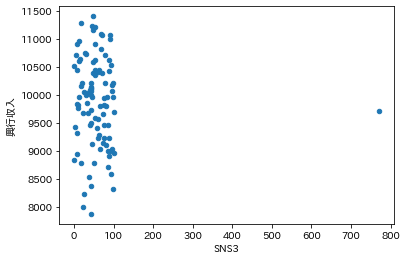

In [ ]:
# 横軸を「SNS3」、縦軸を「興行収入」として散布図を作成する
df_fillna.plot(kind = 'scatter', x = 'SNS3', y = '興行収入')

In [ ]:
# 上記の散布図で一番右の外れ値を削除する。
# 本来なら条件が1つで判断できるが、練習のために2つの条件を組み合わせてデータを特定する
# SNS3が700以上、興行収入が8500以上の条件を組み合わせる
# 該当データのインデックスを取得する
index_outliner = df_fillna[(df_fillna['SNS3'] >= 700) & (df_fillna['興行収入'] >= 8500)].index

# 取得したインデックスを表示する
print(index_outliner)

# インデックス指定でデータを削除する
df_drop_outlier = df_fillna.drop(index_outliner, axis = 0)

Int64Index([33], dtype='int64')


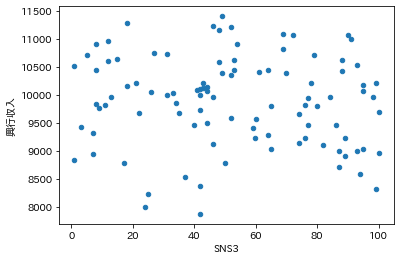

In [ ]:
# 外れ値を削除したデータで横軸を「SNS3」、縦軸を「興行収入」として散布図を作成する
df_drop_outlier.plot(kind = 'scatter', x = 'SNS3', y = '興行収入')

In [ ]:
# 「興行収入」とその他の列の相関係数を表示する(「興行収入」同士の相関係数が含まれていて良い)
series_cor = df_drop_outlier.corr()["興行収入"]

print(series_cor)

映画ID   -0.086897
SNS1    0.656555
SNS2    0.476655
SNS3   -0.092341
俳優      0.776326
原作有無    0.392945
興行収入    1.000000
Name: 興行収入, dtype: float64


In [ ]:
# 上記の相関係数の絶対値を降順に表示する
# 相関係数の絶対値を求め、abs_series_corに代入する
abs_series_cor =  series_cor.map(abs)
# abs_series_corを降順に並び替えて表示する
abs_series_cor.sort_values(ascending = False)

興行収入    1.000000
俳優      0.776326
SNS1    0.656555
SNS2    0.476655
原作有無    0.392945
SNS3    0.092341
映画ID    0.086897
Name: 興行収入, dtype: float64

In [ ]:
# 特徴量と正解データを以下の列とする
# 特徴量　…　「俳優」「SNS1」「SNS2」「原作有無」
# 正解データ　…　「興行収入」

# 特徴量をXに代入する
X = df_drop_outlier[['俳優','SNS1','SNS2','原作有無']].copy()

# 正解データをyに代入する
y = df_drop_outlier[['興行収入']]

In [ ]:
# 「SNS2」の2乗を「SNS2**2」という名前で特徴量のデータフレームに追加する
X['SNS2**2'] = X['SNS2'] ** 2

In [ ]:
# 変数X, 変数yを「学習で用いるデータ」と「テストで用いるデータ」に分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# StandardScalerのオブジェクトを生成し、変数sc_model_Xに代入する
sc_model_X = StandardScaler()

# 上記オブジェクトを使い、X_trainの情報を標準化し、変数X_train_scに代入する　
sc_model_X.fit(X_train)
X_train_sc = sc_model_X.transform(X_train)

# StandardScalerのオブジェクトを生成し、変数sc_model_yに代入する
sc_model_y = StandardScaler()

# 上記オブジェクトを使い、y_trainの情報を標準化し、変数y_train_scに代入する
sc_model_y.fit(y_train)
y_train_sc = sc_model_y.transform(y_train)

In [ ]:
# 回帰のオブジェクトを作成する
model = LinearRegression()

# 「学習で用いるデータ」を使って学習させる
model.fit(X_train_sc, y_train_sc)

LinearRegression()

In [ ]:
# 「テストで用いるデータ」を標準化する
X_test_sc = sc_model_X.transform(X_test)

y_test_sc = sc_model_y.transform(y_test)

# 「テストで用いるデータ」の決定係数を計算し、表示する
print(model.score(X_test_sc, y_test_sc))

0.6682798694722888


In [ ]:
# 特徴量(X_train)の列名を表示する
print(X_train.columns)

# 各カラムの係数を確認する
print(model.coef_)

# 切片を確認する
print(model.intercept_)

Index(['俳優', 'SNS1', 'SNS2', '原作有無', 'SNS2**2'], dtype='object')
[[0.46551777 0.31859777 0.19656577 0.14823936 0.05631339]]
[5.9223154e-16]


学習させた線形回帰を使い、下記のデータで予測する

|俳優|SNS1|SNS2|原作有無|
| ----: | ----: | ----: | ----: |
|10290|350|400|1|

In [ ]:
# 上記の表のデータでの予測結果を求める
predict_actor = 10290
predict_sns1 = 350
predict_sns2 = 400
predict_original = 1
predict_data = pd.DataFrame([[predict_actor, predict_sns1, predict_sns2, predict_original, predict_sns2 ** 2]])


# X_trainの情報で予測データを標準化し、変数predict_data_scに代入する
predict_data_sc = sc_model_X.transform(predict_data)

# predict_data_scの内容で予測し、結果を変数predicted_price_scに代入する
predicted_price_sc = model.predict(predict_data_sc)

# predicted_price_scの標準化を元に戻し、結果を変数predicted_priceに代入する
predicted_price = sc_model_y.inverse_transform(predicted_price_sc)

# 結果を表示する
print(predicted_price)

[[9949.9990031]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
